# How to Use T Pot

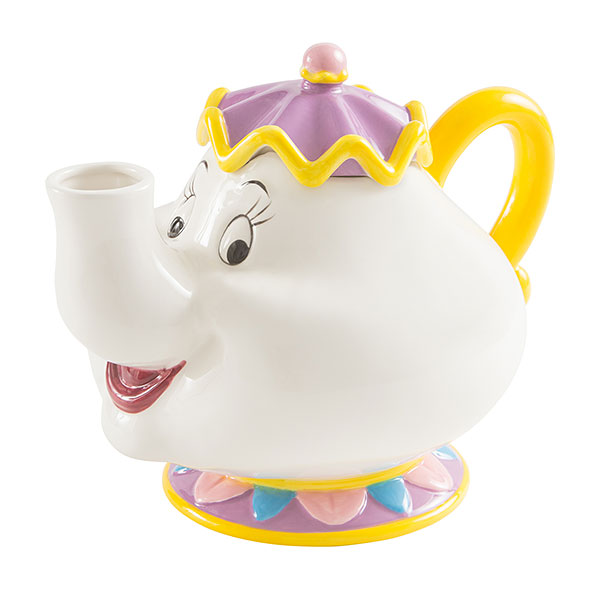

In [2]:
from IPython.display import Image
Image("images/teapot.jpg")

# What is T Pot?
+ TPOT will automate the most tedious part of machine learning by intelligently exploring thousands of possible pipelines to find the best one for your data.
+ Long story short, if you are trying to look for the best classification or regression algorithom, you pretty much feed T Pot your data, and it will select the best algorithom for your data!
+ It will also give you the actual python code for the algorithom it chooses so you can tinker with it and implement it!

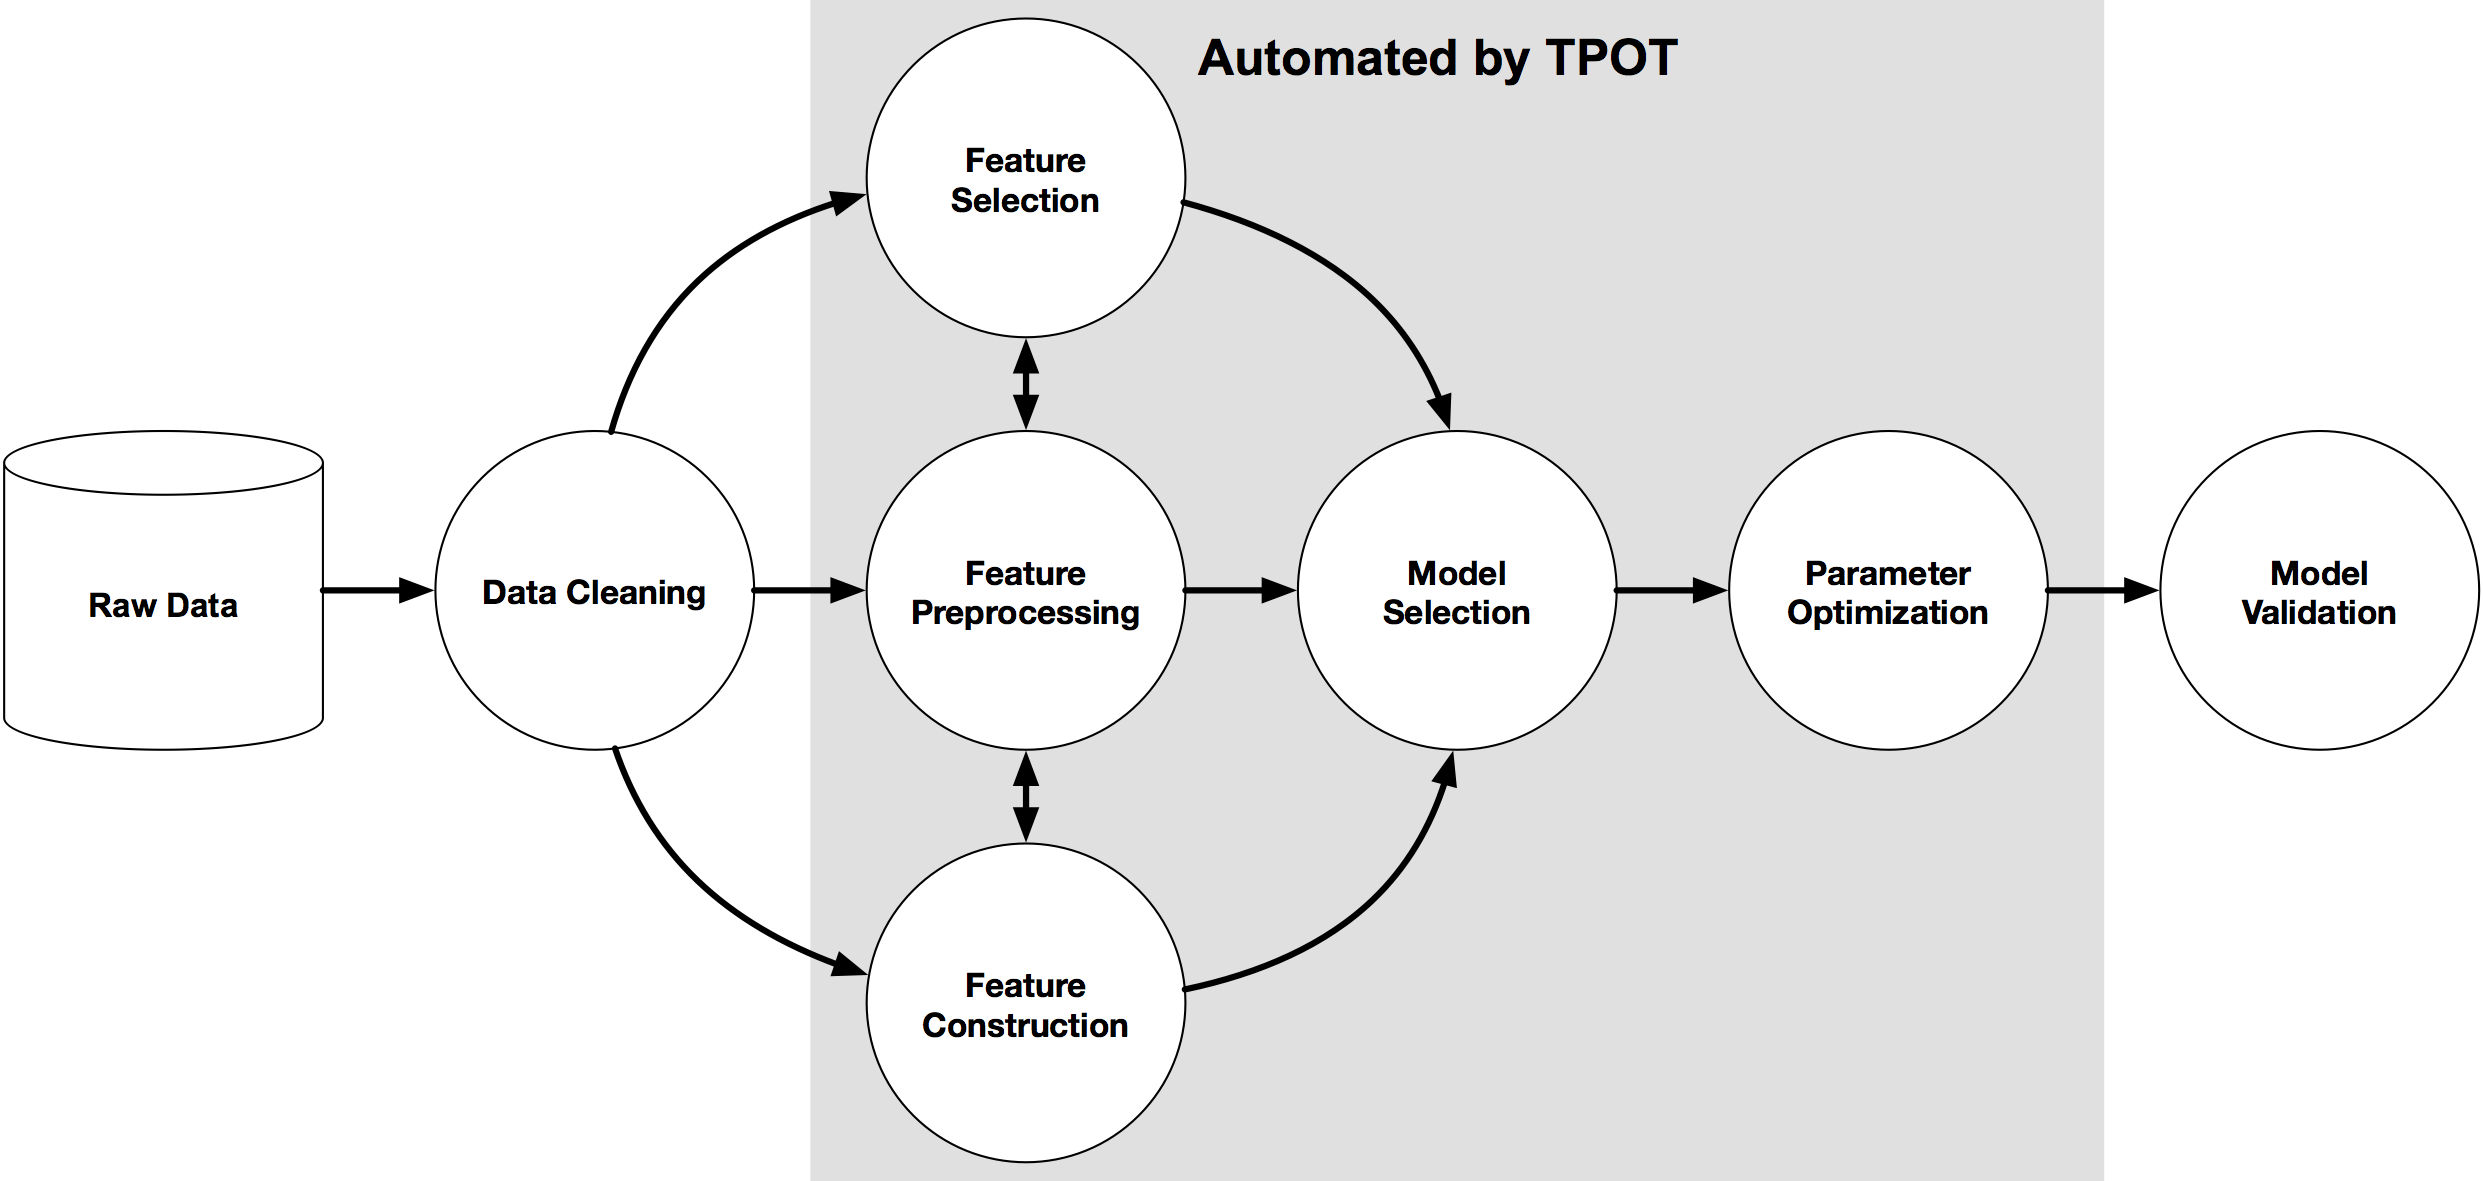

In [4]:
from IPython.display import Image
Image("images/pipeline.png")

# What is in this tutorial?
+ I will go through a Diamonds.csv data set and show you how to prepare your data for T Pot
+ I will let T Pot do its magic and show you its results!
+ I then will use another data set and quickly show you the same steps
+ Lastly, I will show you a code that will work for regression, with a sample data set from SKLearn!

# First, Were going to load in the Diamond data set and change a couple headers out

In [1]:
# Import required libraries
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np

In [2]:
# Load the data
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds = diamonds.drop('Unnamed: 0', axis=1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.rename(columns={'x': 'length', 'y': 'width', 'z': 'depth'}, inplace=True)

In [5]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data Exploration 
### Here, we will just go through a little data exploration with the data set

In [6]:
diamonds.groupby('cut').price.mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

In [7]:
diamonds.groupby(['color','cut']).price.mean()

color  cut      
D      Fair         4291.061350
       Good         3405.382175
       Ideal        2629.094566
       Premium      3631.292576
       Very Good    3470.467284
E      Fair         3682.312500
       Good         3423.644159
       Ideal        2597.550090
       Premium      3538.914420
       Very Good    3214.652083
F      Fair         3827.003205
       Good         3495.750275
       Ideal        3374.939362
       Premium      4324.890176
       Very Good    3778.820240
G      Fair         4239.254777
       Good         4123.482204
       Ideal        3720.706388
       Premium      4500.742134
       Very Good    3872.753806
H      Fair         5135.683168
       Good         4276.254986
       Ideal        3889.334831
       Premium      5216.706780
       Very Good    4535.390351
I      Fair         4685.445714
       Good         5078.532567
       Ideal        4451.970377
       Premium      5946.180672
       Very Good    5255.879568
J      Fair         497

# Data Munging
### The first and most important step in using TPOT on any data set is to rename the target class/response variable to class.

In [8]:
diamonds.rename(columns={'cut': 'class'}, inplace=True)

### As you can see, we have numeric values and also objects, we need to go through and convert to numeric values

In [9]:
diamonds.dtypes

carat      float64
class       object
color       object
clarity     object
depth      float64
table      float64
price        int64
length     float64
width      float64
depth      float64
dtype: object

### We then check the number of levels that each of the three categorical variables have. 

In [10]:
for cat in ['class', 'color', 'clarity']:
    print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, diamonds[cat].unique().size))

Number of levels in category 'class': 5.00 
Number of levels in category 'color': 7.00 
Number of levels in category 'clarity': 8.00 


### Going to check to see exactly what levels are within each of the categories that are not numeric

In [11]:
for cat in ['class', 'color', 'clarity']:
    print("Levels for catgeory '{0}': {1}".format(cat, diamonds[cat].unique()))

Levels for catgeory 'class': ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Levels for catgeory 'color': ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Levels for catgeory 'clarity': ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### We are going to code the "Class" Category manually, and deal with the other two shortly!

In [12]:
diamonds['class'] = diamonds['class'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})

In [13]:
pd.isnull(diamonds).any()

carat      False
class      False
color      False
clarity    False
depth      False
table      False
price      False
length     False
width      False
depth      False
dtype: bool

### For "clairty" and "color", we encode the levels as digits using Scikit-learn's [`MultiLabelBinarizer`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) and treat them as new features. 

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
clarity_1 = mlb.fit_transform([{str(val)} for val in diamonds['clarity'].values])
color_1 = mlb.fit_transform([{str(val)} for val in diamonds['color'].values])

In [16]:
clarity_1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Drop the unused features from the dataset. 

In [17]:
diamonds_new = diamonds.drop(['clarity', 'color', 'class'], axis=1)

### We then add the encoded features to form the final dataset to be used with TPOT. 

In [18]:
diamonds_new = np.hstack((diamonds_new.values, clarity_1,color_1))

In [19]:
np.isnan(diamonds_new).any()

False

### Keeping in mind that the final dataset is in the form of a numpy array, we can check the number of features in the final dataset as follows.

In [20]:
diamonds_new[0].size

22

### Finally we store the class labels, which we need to predict, in a separate variable. 

In [21]:
diamonds_class = diamonds['class'].values

## Data Analysis using TPOT

### To begin our analysis, we need to divide our training data into training and validation sets. The validation set is just to give us an idea of the test set error. The model selection and tuning is entirely taken care of by TPOT, so if we want to, we can skip creating this validation set. Could not really discover any other way to do this, so I WOULD DO THIS! :)

In [22]:
training_indices, validation_indices = training_indices, testing_indices = train_test_split(diamonds.index, stratify = diamonds_class, train_size=0.75, test_size=0.25)
training_indices.size, validation_indices.size

(40455, 13485)

### Usually you would go ahead in this next step and set the number of generations.  Since this is a tutorial, we are going to shorten it, since if not, it would take a good amount of time.  Usually, for you average labtop, it would take 5 minutes per generation. Without setting a generation, the default is 100 GENERATIONS.  If you can do math, you should know that would take awhile.  So what you see below is that we actually keep it at the default, but limit the max time to 2 minutes.  So whatever it gets done within 2 minutes is what it will display! 

In [24]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=2, max_eval_time_mins=0.04, population_size=15)
tpot.fit(diamonds_new[training_indices], diamonds_class[training_indices])

C:\Users\Robin\Anaconda2\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\Robin\Anaconda2\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Generation 1 - Current best internal CV score: 0.744456863158


Generation 2 - Current best internal CV score: 0.744456863158


Generation 3 - Current best internal CV score: 0.744456863158


2.03021666667 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.



Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=9, min_samples_leaf=16, min_samples_split=8)


TPOTClassifier(config_dict={'sklearn.ensemble.GradientBoostingClassifier': {'max_features': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ]), 'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0], 'min_samples_... 0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}, 'sklearn.preprocessing.RobustScaler': {}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=1000000, max_eval_time_mins=0.04,
        max_time_mins=2, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=15, periodic_checkpoint_folder=None,
        population_size=15, random_state=None, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

### As you can see above, we got a model that is 74 % accuarte and the model that it used or was the best was Decision Tree Classifier!  I would suggest doing this just a couple times, to see if you get anything different!

In [25]:
tpot.score(diamonds_new[validation_indices], diamonds.loc[validation_indices, 'class'].values)

0.74653318502039301

### Here, we are just importing the actual pipline that it created for the Decsision Tree Classifier into a .PY file

In [26]:
tpot.export('tpot_diamonds_pipeline.py')

True

### As you can see below, this is actually what is in the .PY file that T Pot produced.  Now you can go ahead and implement this and deploy your model quite easily or make any changes!

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:0.744456863158
exported_pipeline = DecisionTreeClassifier(criterion="gini", max_depth=9, min_samples_leaf=16, min_samples_split=8)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

# Here Below, I am going to do exactly what I did above but for a different, familiar data set, one about Heart Attacks

In [27]:
# Load the data
heartattack = pd.read_csv('data/heartattack_train.csv')
heartattack.head(5)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
0,60,2,0,1,150,1,50,Yes
1,69,2,1,1,170,0,60,Yes
2,52,1,0,0,174,1,35,No
3,66,2,1,1,169,0,60,Yes
4,70,3,0,1,237,0,65,Yes


In [28]:
heartattack.rename(columns={'2nd_Heart_Attack': 'sec_heart_attack'}, inplace=True)

In [29]:
heartattack.groupby('Gender').sec_heart_attack.value_counts()

Gender  sec_heart_attack
0       No                  37
        Yes                 15
1       Yes                 53
        No                  33
Name: sec_heart_attack, dtype: int64

In [30]:
heartattack.groupby(['Marital_Status','Gender']).sec_heart_attack.value_counts()

Marital_Status  Gender  sec_heart_attack
0               0       No                   1
                1       No                   7
1               0       No                  23
                        Yes                  4
                1       No                  17
                        Yes                  6
2               0       Yes                  6
                        No                   3
                1       Yes                 42
                        No                   5
3               0       No                  10
                        Yes                  5
                1       Yes                  5
                        No                   4
Name: sec_heart_attack, dtype: int64

In [31]:
print heartattack.dtypes

Age                   int64
Marital_Status        int64
Gender                int64
Weight_Category       int64
Cholesterol           int64
Stress_Management     int64
Trait_Anxiety         int64
sec_heart_attack     object
dtype: object


In [32]:
heartattack = heartattack.replace({'sec_heart_attack': 'No'}, {'sec_heart_attack': '0'})
heartattack = heartattack.replace({'sec_heart_attack': 'Yes'}, {'sec_heart_attack': '1'})

In [33]:
heartattack['sec_heart_attack'] = heartattack['sec_heart_attack'].astype(int)
print heartattack.dtypes

Age                  int64
Marital_Status       int64
Gender               int64
Weight_Category      int64
Cholesterol          int64
Stress_Management    int64
Trait_Anxiety        int64
sec_heart_attack     int32
dtype: object


In [34]:
heartattack.rename(columns={'sec_heart_attack': 'class'}, inplace=True)

In [35]:
heartattack_class = heartattack['class'].values

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mstatus = mlb.fit_transform([{str(val)} for val in heartattack['Marital_Status'].values])

In [37]:
heartattack_new = heartattack.drop(['Marital_Status', 'class'], axis=1)

In [38]:
heartattack_new = np.hstack((heartattack.values,mstatus))

In [39]:
np.isnan(heartattack_new).any()

False

In [40]:
heartattack_new[0].size

12

In [41]:
training_indices, validation_indices = training_indices, testing_indices = train_test_split(heartattack.index, stratify = heartattack_class, train_size=0.75, test_size=0.25)
training_indices.size, validation_indices.size

(103, 35)

In [42]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=2, max_eval_time_mins=0.04, population_size=20)
tpot.fit(heartattack_new[training_indices], heartattack_class[training_indices])

Generation 1 - Current best internal CV score: 1.0


Generation 2 - Current best internal CV score: 1.0


Generation 3 - Current best internal CV score: 1.0


Generation 4 - Current best internal CV score: 1.0


Generation 5 - Current best internal CV score: 1.0


Generation 6 - Current best internal CV score: 1.0


Generation 7 - Current best internal CV score: 1.0


2.01691666667 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.



Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.25, min_samples_leaf=10, min_samples_split=13, n_estimators=100)


TPOTClassifier(config_dict={'sklearn.ensemble.GradientBoostingClassifier': {'max_features': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ]), 'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0], 'min_samples_... 0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}, 'sklearn.preprocessing.RobustScaler': {}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=1000000, max_eval_time_mins=0.04,
        max_time_mins=2, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=20, periodic_checkpoint_folder=None,
        population_size=20, random_state=None, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

In [43]:
tpot.score(heartattack_new[validation_indices], heartattack.loc[validation_indices, 'class'].values)

1.0

In [44]:
tpot.export('tpot_heartattack_pipeline.py')

True

# I pretty much did the exact same thing, and it produced a model that is 100% accurate! (I would reevalute it to see if there is something wrong since 100% usually never happens)  But it did say that Random Forest Classifier was the best model and below is what it produced into a .PY File!

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:1.0
exported_pipeline = RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.25, min_samples_leaf=10, min_samples_split=13, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

# Here below is just a quick example of T Pot code in action for regression, I tried messing with another data set to get it to work with regression and for some reason it was not working out.  This does show you how it works and that it does work to produce the best model possible! ( Which came out to be Random Forest Regressor!)

In [45]:
from tpot import TPOTRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

housing = load_boston()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_boston_pipeline.py')

Generation 1 - Current best internal CV score: 16.2808241119


Generation 2 - Current best internal CV score: 16.2808241119


Generation 3 - Current best internal CV score: 15.4116820875


Generation 4 - Current best internal CV score: 15.4116820875


Generation 5 - Current best internal CV score: 14.034899652



Best pipeline: ExtraTreesRegressor(RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.35, min_samples_leaf=7, min_samples_split=20, n_estimators=100), bootstrap=False, max_features=0.35, min_samples_leaf=2, min_samples_split=17, n_estimators=100)
11.1801909305


True

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:-14.034899652
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=False, max_features=0.35, min_samples_leaf=7, min_samples_split=20, n_estimators=100)),
    ExtraTreesRegressor(bootstrap=False, max_features=0.35, min_samples_leaf=2, min_samples_split=17, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)